<a href="https://colab.research.google.com/github/gilsonauerswald/Bioinformatic_Projects/blob/main/R_C2_L5_Data_visualization_using_t_SNE.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Welcome Back to R-Coding Course 2!**

In the previous lesson, we covered Dimensionality reduction: PCA & visualizationn. If you haven't completed these topics, please refer to [L04 - Dimensionality reduction PCA & visulaization](https://learn.omicslogic.com/R-Code/r-coding-course-2-introduction-to-data-science-bioml/lesson/04-dimensionality-reduction-pca-and-visualization) before practicing the codes for this lesson.

# **Let's Recap!**

Now that we've covered essential concepts in [L05 - Data visualization using t-SNE](https://learn.omicslogic.com/R-Code/r-coding-course-2-introduction-to-data-science-bioml/lesson/05-data-visualization-using-t-sne), let's take a moment to reinforce what we've learned so far. We'll start with a brief recap of the codes and techniques we've explored in the lesson.

# **Lesson Code Breakdown**

## **1. Install packages**

In [ ]:
#Load libraries/packages
install.packages("Rtsne")
library(Rtsne)
library(ggplot2)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)




This R code installs the "Rtsne" package, which provides an implementation of the t-distributed Stochastic Neighbor Embedding (t-SNE) algorithm, and then loads the "Rtsne" and "ggplot2" libraries for use in the R environment.

## **2. Load data**

In [ ]:
#load data
data<- read.table('https://raw.githubusercontent.com/PineBiotech/bioinformatics/master/15gene_transposed.txt', sep='\t', header=TRUE, check.names=FALSE, stringsAsFactors=TRUE, row.names=1)
#Check dimension of data to check whether data get loaded or not
dim(data)

[1] 52 16


This R code loads data from a specified URL into a data frame named data using the read.table function. The dimensions of the data frame are then checked using the dim function to verify whether the data was successfully loaded.

## **3. Remove non-numeric (character) columns**

In [ ]:
#Take numeric data without groups
df <- data[2:16]
#Check Dimensions
dim(df)

[1] 52 15


This R code creates a new data frame named df by selecting columns 2 through 16 from the existing data frame data. The dim function is then used to check the dimensions of the new data frame, providing information about the number of rows and columns.

## **4. Generate t-SNE components**

In [ ]:
#Generate t-SNE components
tsne_realData <- Rtsne(df, perplexity=15, verbose=TRUE, max_iter = 550, check_duplicates = FALSE)

Performing PCA
Read the 52 x 15 data matrix successfully!
OpenMP is working. 1 threads.
Using no_dims = 2, perplexity = 15.000000, and theta = 0.500000
Computing input similarities...
Building tree...
Done in 0.00 seconds (sparsity = 0.954142)!
Learning embedding...
Iteration 50: error is 54.208666 (50 iterations in 0.00 seconds)
Iteration 100: error is 51.752500 (50 iterations in 0.00 seconds)
Iteration 150: error is 49.667606 (50 iterations in 0.00 seconds)
Iteration 200: error is 52.488344 (50 iterations in 0.00 seconds)
Iteration 250: error is 51.797212 (50 iterations in 0.00 seconds)
Iteration 300: error is 1.194035 (50 iterations in 0.00 seconds)
Iteration 350: error is 0.678198 (50 iterations in 0.00 seconds)
Iteration 400: error is 0.335790 (50 iterations in 0.00 seconds)
Iteration 450: error is 0.154007 (50 iterations in 0.00 seconds)
Iteration 500: error is 0.144805 (50 iterations in 0.00 seconds)
Iteration 550: error is 0.136854 (50 iterations in 0.00 seconds)
Fitting perfor


This R code applies the t-Distributed Stochastic Neighbor Embedding (t-SNE) algorithm to the numeric data frame df using the Rtsne function. The perplexity parameter is set to 15, and other parameters such as verbose, max_iter, and check_duplicates are specified. The resulting t-SNE components are stored in the tsne_realData object.

## **5. Plot t-SNE plot**

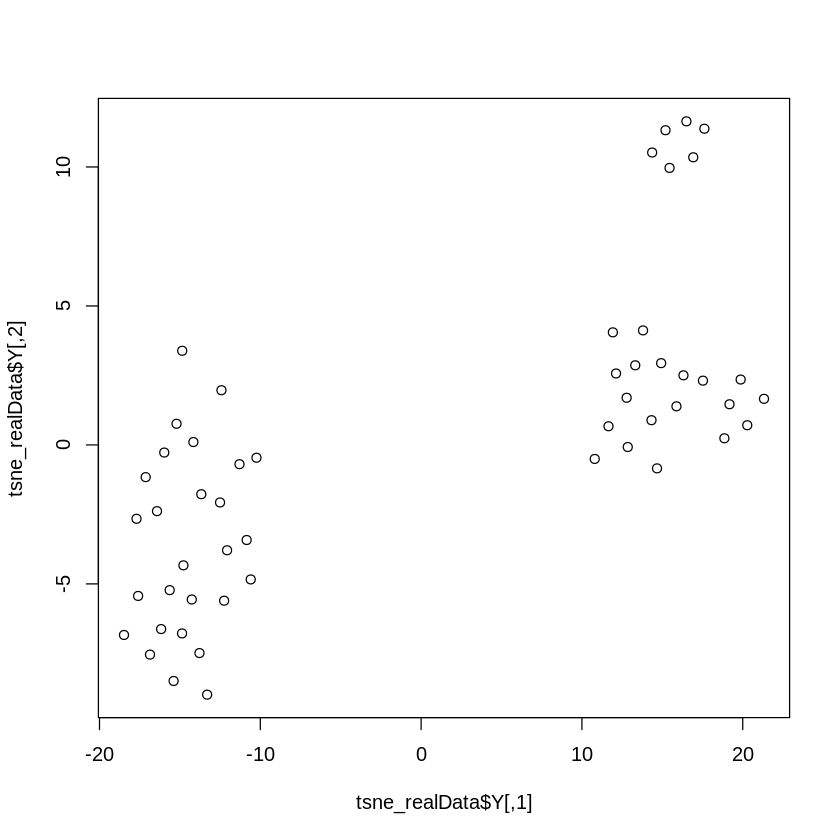

In [ ]:
#plot tSNE
plot(tsne_realData$Y)

This R code uses the plot function to visualize the t-SNE components stored in the tsne_realData$Y object. The resulting plot displays the data points in the two-dimensional t-SNE space.

## **6. Add Colors to the plot**

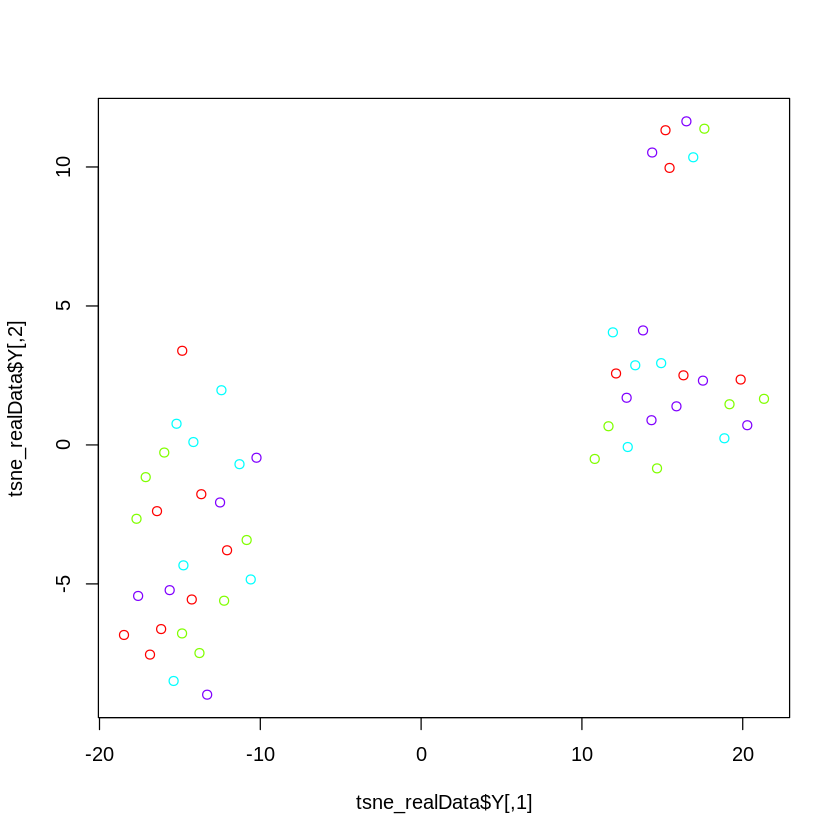

In [ ]:
#Add colors as per samples class or category
colors = rainbow(length(unique(data$Group)))
#Draw t-SNE plot with coloring data points
plot(tsne_realData$Y,  col=colors)

This R code generates a t-SNE plot using the plot function and colors the data points based on the "Group" variable from the original data frame. The colors vector is created using the rainbow function to generate a range of colors corresponding to the unique categories in the "Group" variable. The resulting plot provides a visual representation of the data points in the t-SNE space, with distinct colors for each group.

## **7. Add labels of samples**

In [ ]:
#Make TSNE object as datafarme
tsne_df <- as.data.frame(tsne_realData$Y)
head(tsne_df)

,V1,V2
,<dbl>,<dbl>
1,19.87162,2.352904
2,19.17834,1.463849
3,13.31679,2.865408
4,12.78101,1.696915
5,12.12246,2.570833
6,-17.69863,-2.656873


This R code converts the t-SNE components stored in tsne_realData$Y into a data frame named tsne_df using the as.data.frame function. The head function is then used to display the first few rows of the resulting data frame, providing a glimpse of the t-SNE coordinates for each data point.

## **8. Extract labels of samples from the data**

In [ ]:
#Extract labels of samples
lab <- data$Group

This R code extracts the labels of samples from the "Group" variable in the original data frame data and stores them in the lab object. The lab object now contains the group labels associated with each sample in the dataset.

## **9. Create a combined data of t-SNE object with the labels of samples.**

In [ ]:
#Combine sample labels with t-SNE plot
tsne_df1 <- cbind(tsne_df,lab)
#Add column names
colnames(tsne_df1) <- c("X","Y","Labels")
head(tsne_df1)

,X,Y,Labels
,<dbl>,<dbl>,<fct>
1,19.87162,2.352904,Normal-like
2,19.17834,1.463849,Normal-like
3,13.31679,2.865408,Basal
4,12.78101,1.696915,Basal
5,12.12246,2.570833,Basal
6,-17.69863,-2.656873,Luminal


This R code combines the t-SNE coordinates from the tsne_df data frame with the sample labels from the lab object, creating a new data frame named tsne_df1. The resulting data frame has three columns: "X," "Y," and "Labels," representing the t-SNE coordinates and sample labels, respectively. The colnames function is used to assign column names to the new data frame, and head displays the first few rows of the combined data.

## **10. Plot colored t-SNE plot with labels**

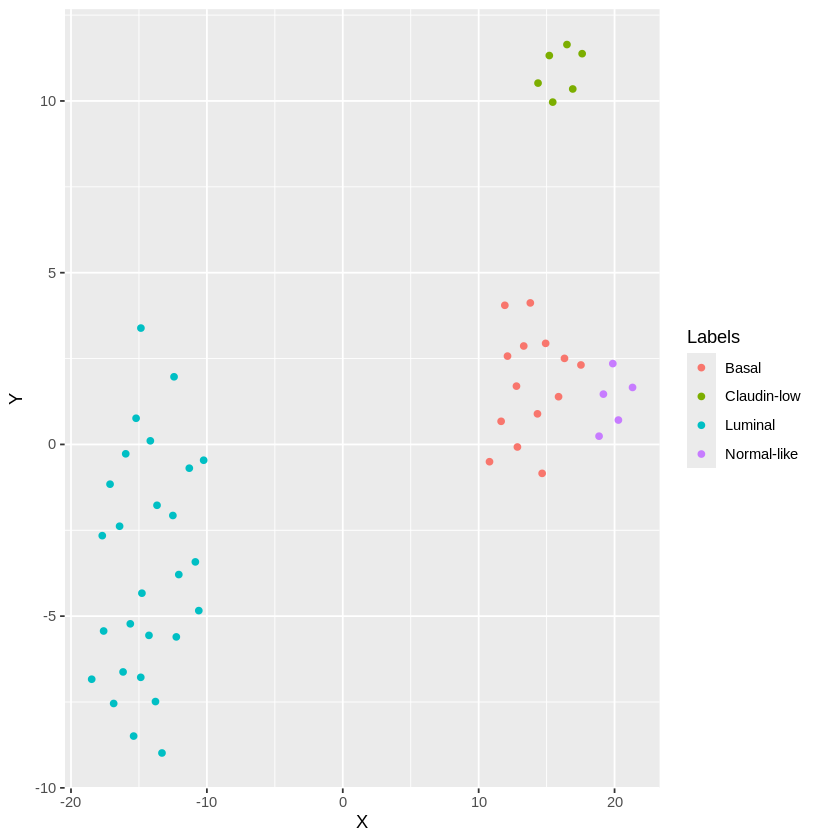

In [ ]:
ggplot(tsne_df1, aes(X, Y, colour = Labels)) +geom_point()

This R code uses the ggplot2 package to create a scatter plot with t-SNE coordinates from the tsne_df1 data frame. The aes function specifies that the x-axis represents the "X" column, the y-axis represents the "Y" column, and the color of points is determined by the "Labels" column. The geom_point() function adds points to the plot. The resulting plot provides a visual representation of the t-SNE space with different colors for each sample group.